In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=1f9519316e8eaee11a6f8bfb497a0e6fc3c8e01151c0667d6a27cb23f02ea839
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#CONFIGURAR A SESSÃO SPARK
spark = (SparkSession.builder
                     .master('local')
                     .appName('Analise_MBA')
                     .config('spark.ui.port', '4050')
                     .getOrCreate())

In [ ]:
spark

In [ ]:
df_aisles = (spark.read.format('csv')
                       .option('delimiter', ',')
                       .option('header', 'true')
                       .option('inferschema', 'true')
                       .load('/content/drive/MyDrive/Join/aisles.csv'))

In [ ]:
df_products_prior = (spark.read.format('csv')
                       .option('delimiter', ',')
                       .option('header', 'true')
                       .option('inferschema', 'true')
                       .load('/content/drive/MyDrive/Join/order_products__prior.csv'))

In [ ]:
df_products = (spark.read.format('csv')
                       .option('delimiter', ',')
                       .option('header', 'true')
                       .option('inferschema', 'true')
                       .load('/content/drive/MyDrive/Join/products.csv'))

In [ ]:
df_departments = (spark.read.format('csv')
                       .option('delimiter', ',')
                       .option('header', 'true')
                       .option('inferschema', 'true')
                       .load('/content/drive/MyDrive/Join/departments.csv'))

In [ ]:
df_orders = (spark.read.format('csv')
                       .option('delimiter', ',')
                       .option('header', 'true')
                       .option('inferschema', 'true')
                       .load('/content/drive/MyDrive/Join/orders.csv'))

In [ ]:
df_departments.show(3)

+-------------+----------+
|department_id|department|
+-------------+----------+
|            1|    frozen|
|            2|     other|
|            3|    bakery|
+-------------+----------+
only showing top 3 rows



In [ ]:
df_departments.count()

21

In [ ]:
df_departments.show()

+-------------+---------------+
|department_id|     department|
+-------------+---------------+
|            1|         frozen|
|            2|          other|
|            3|         bakery|
|            4|        produce|
|            5|        alcohol|
|            6|  international|
|            7|      beverages|
|            8|           pets|
|            9|dry goods pasta|
|           10|           bulk|
|           11|  personal care|
|           12|   meat seafood|
|           13|         pantry|
|           14|      breakfast|
|           15|   canned goods|
|           16|     dairy eggs|
|           17|      household|
|           18|         babies|
|           19|         snacks|
|           20|           deli|
+-------------+---------------+
only showing top 20 rows



In [ ]:
df_orders.count()

3421083

In [ ]:
df_orders.show(3)

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
| 2539329|      1|   prior|           1|        2|                8|                  null|
| 2398795|      1|   prior|           2|        3|                7|                  15.0|
|  473747|      1|   prior|           3|        3|               12|                  21.0|
+--------+-------+--------+------------+---------+-----------------+----------------------+
only showing top 3 rows



In [ ]:
df_products_prior.show(3)

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       2|     33120|                1|        1|
|       2|     28985|                2|        1|
|       2|      9327|                3|        0|
+--------+----------+-----------------+---------+
only showing top 3 rows



In [ ]:
df_aisles.show(5, truncate=False)

+--------+--------------------------+
|aisle_id|aisle                     |
+--------+--------------------------+
|1       |prepared soups salads     |
|2       |specialty cheeses         |
|3       |energy granola bars       |
|4       |instant foods             |
|5       |marinades meat preparation|
+--------+--------------------------+
only showing top 5 rows



In [ ]:
df_products.show(5, truncate=False)

+----------+-----------------------------------------------------------------+--------+-------------+
|product_id|product_name                                                     |aisle_id|department_id|
+----------+-----------------------------------------------------------------+--------+-------------+
|1         |Chocolate Sandwich Cookies                                       |61      |19           |
|2         |All-Seasons Salt                                                 |104     |13           |
|3         |Robust Golden Unsweetened Oolong Tea                             |94      |7            |
|4         |Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce|38      |1            |
|5         |Green Chile Anytime Sauce                                        |5       |13           |
+----------+-----------------------------------------------------------------+--------+-------------+
only showing top 5 rows



In [ ]:
df_backup = df_products_prior

In [ ]:
df_products_prior = df_products_prior.dropna(how='any')

In [ ]:
df_products_prior.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_products_prior.columns]).show()

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       0|         0|                0|        0|
+--------+----------+-----------------+---------+



In [ ]:
df_products_prior.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)



In [ ]:
df_orders.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_orders.columns]).show()

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
|       0|      0|       0|           0|        0|                0|                206209|
+--------+-------+--------+------------+---------+-----------------+----------------------+



In [ ]:
df_products_prior = df_backup

In [ ]:
df_products_prior = df_products_prior.withColumn('pedido_anteriormente', F.regexp_replace(F.col('reordered'), '1', "Sim"))

In [ ]:
df_products_prior = df_products_prior.withColumn('pedido_anteriormente', F.regexp_replace(F.col('pedido_anteriormente'), '0', "Nao"))

In [ ]:
df_products_prior.show()

+--------+----------+-----------------+---------+--------------------+
|order_id|product_id|add_to_cart_order|reordered|pedido_anteriormente|
+--------+----------+-----------------+---------+--------------------+
|       2|     33120|                1|        1|                 Sim|
|       2|     28985|                2|        1|                 Sim|
|       2|      9327|                3|        0|                 Nao|
|       2|     45918|                4|        1|                 Sim|
|       2|     30035|                5|        0|                 Nao|
|       2|     17794|                6|        1|                 Sim|
|       2|     40141|                7|        1|                 Sim|
|       2|      1819|                8|        1|                 Sim|
|       2|     43668|                9|        0|                 Nao|
|       3|     33754|                1|        1|                 Sim|
|       3|     24838|                2|        1|                 Sim|
|     

In [ ]:
# 1º JOIN - df_order_product_prior com order
df_join = df_products_prior.join(df_orders, on=['order_id'], how='left')

In [ ]:
df_join.select('*').orderBy(F.col('order_id').desc()).show(5)

+--------+----------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|product_id|add_to_cart_order|reordered|pedido_anteriormente|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+----------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+
|  807691|     42450|                1|        1|                 Sim| 128790|   prior|          41|        6|               10|                   4.0|
|  807691|     25186|                2|        1|                 Sim| 128790|   prior|          41|        6|               10|                   4.0|
|  807691|     33071|                3|        1|                 Sim| 128790|   prior|          41|        6|               10|                   4.0|
|  807691|     16291|                4|        1|                 Sim| 128790|   prior| 

In [ ]:
df_join.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_join.columns]).show()

+--------+----------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|product_id|add_to_cart_order|reordered|pedido_anteriormente|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+----------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+
|       0|         1|                1|        1|                   1|      0|       0|           0|        0|                0|                491677|
+--------+----------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+



In [ ]:
df_products.show(5)

+----------+--------------------+--------+-------------+
|product_id|        product_name|aisle_id|department_id|
+----------+--------------------+--------+-------------+
|         1|Chocolate Sandwic...|      61|           19|
|         2|    All-Seasons Salt|     104|           13|
|         3|Robust Golden Uns...|      94|            7|
|         4|Smart Ones Classi...|      38|            1|
|         5|Green Chile Anyti...|       5|           13|
+----------+--------------------+--------+-------------+
only showing top 5 rows



In [ ]:
# 2º JOIN df_joincom product
df_join = df_join.join(df_products, on=['product_id'], how='left')

In [ ]:
# 3º JOIN df_join com aisles
df_join = df_join.join(df_aisles, on=['aisle_id'], how='left')

In [ ]:
#4º JOIN df_join com department
df_join = df_join.join(df_departments, on=['department_id'], how='left')

In [ ]:
df_join.printSchema()

root
 |-- department_id: string (nullable = true)
 |-- aisle_id: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- order_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)
 |-- pedido_anteriormente: string (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- eval_set: string (nullable = true)
 |-- order_number: integer (nullable = true)
 |-- order_dow: integer (nullable = true)
 |-- order_hour_of_day: integer (nullable = true)
 |-- days_since_prior_order: double (nullable = true)
 |-- product_name: string (nullable = true)
 |-- aisle: string (nullable = true)
 |-- department: string (nullable = true)



In [ ]:
df_join.show()

+-------------+--------+----------+--------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+-------------+
|department_id|aisle_id|product_id|order_id|add_to_cart_order|reordered|pedido_anteriormente|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|        product_name|               aisle|   department|
+-------------+--------+----------+--------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+-------------+
|           16|     120|     33754|       3|                1|        1|                 Sim| 205970|   prior|          16|        5|               17|                  12.0|Total 2% with Str...|              yogurt|   dairy eggs|
|           16|      91|     24838|       3|                2|        1|    

In [ ]:
#EXISTEM VALORES NULOS NOS DATAFRAMES?
df_join.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_join.columns]).show()

+-------------+--------+----------+--------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+------------+-----+----------+
|department_id|aisle_id|product_id|order_id|add_to_cart_order|reordered|pedido_anteriormente|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|product_name|aisle|department|
+-------------+--------+----------+--------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+------------+-----+----------+
|            1|       1|         1|       0|                1|        1|                   1|      0|       0|           0|        0|                0|                491677|           1|    2|         2|
+-------------+--------+----------+--------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+------

In [ ]:
df_products_prior.show(3)

+--------+----------+-----------------+---------+--------------------+
|order_id|product_id|add_to_cart_order|reordered|pedido_anteriormente|
+--------+----------+-----------------+---------+--------------------+
|       2|     33120|                1|        1|                 Sim|
|       2|     28985|                2|        1|                 Sim|
|       2|      9327|                3|        0|                 Nao|
+--------+----------+-----------------+---------+--------------------+
only showing top 3 rows



In [ ]:
df_products.show(3)

+----------+--------------------+--------+-------------+
|product_id|        product_name|aisle_id|department_id|
+----------+--------------------+--------+-------------+
|         1|Chocolate Sandwic...|      61|           19|
|         2|    All-Seasons Salt|     104|           13|
|         3|Robust Golden Uns...|      94|            7|
+----------+--------------------+--------+-------------+
only showing top 3 rows



In [ ]:
df_aisles.show(3)

+--------+--------------------+
|aisle_id|               aisle|
+--------+--------------------+
|       1|prepared soups sa...|
|       2|   specialty cheeses|
|       3| energy granola bars|
+--------+--------------------+
only showing top 3 rows



In [ ]:
df_orders.show(3)

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
| 2539329|      1|   prior|           1|        2|                8|                  null|
| 2398795|      1|   prior|           2|        3|                7|                  15.0|
|  473747|      1|   prior|           3|        3|               12|                  21.0|
+--------+-------+--------+------------+---------+-----------------+----------------------+
only showing top 3 rows



In [ ]:
#DROPAR O ÚNICO REGISTRO QUE POSSUI DADOS NULOS EM AISLE E DEPARTMENT
df_join = df_join.dropna(how='any', subset='aisle')
df_join = df_join.dropna(how='any', subset='department')

In [ ]:
#CALCULAR O PERCENTUAL DE VALORES AUSENTES NA COLUNA days_since_prior_order
media = (df_join.filter(F.col('days_since_prior_order').isNull() | F.isnan(F.col('days_since_prior_order'))).count() / df_join.select('days_since_prior_order').count() * 100)

print(media)

6.426013804355909


In [ ]:
df = df_join

In [ ]:
df.show()

+-------------+--------+----------+--------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+---------------+
|department_id|aisle_id|product_id|order_id|add_to_cart_order|reordered|pedido_anteriormente|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|        product_name|               aisle|     department|
+-------------+--------+----------+--------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+---------------+
|           16|     120|     33754|       3|                1|        1|                 Sim| 205970|   prior|          16|        5|               17|                  12.0|Total 2% with Str...|              yogurt|     dairy eggs|
|           16|      91|     24838|       3|                2|      

1) QUAL O NÚMERO DE PEDIDOS MAIS FREQUENTES ENTRE OS CLIENTES?

In [ ]:
df_orders.show(5)

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
| 2539329|      1|   prior|           1|        2|                8|                  null|
| 2398795|      1|   prior|           2|        3|                7|                  15.0|
|  473747|      1|   prior|           3|        3|               12|                  21.0|
| 2254736|      1|   prior|           4|        4|                7|                  29.0|
|  431534|      1|   prior|           5|        4|               15|                  28.0|
+--------+-------+--------+------------+---------+-----------------+----------------------+
only showing top 5 rows



In [ ]:
#              QUAL O NÚMERO DE PEDIDOS MAIS FREQUENTES ENTRE OS CLIENTES?
qtd_compras_usuarios = df_orders.groupBy(F.col('user_id')).agg(F.count('order_number').alias('qtd_pedidos')).orderBy(F.col('user_id').asc())

In [ ]:
qtd_compras_usuarios.show(2)

+-------+-----------+
|user_id|qtd_pedidos|
+-------+-----------+
|      1|         11|
|      2|         15|
+-------+-----------+
only showing top 2 rows



In [ ]:
qtd_compras_usuarios.groupBy('qtd_pedidos').agg(F.count('qtd_pedidos').alias('frequencia')).orderBy(F.col('frequencia').desc()).show(2)

+-----------+----------+
|qtd_pedidos|frequencia|
+-----------+----------+
|          4|     23986|
|          5|     19590|
+-----------+----------+
only showing top 2 rows



In [ ]:
df_orders.groupBy(F.col('order_number')).agg(F.count('order_number').alias('n de pedidos')).orderBy(F.col('n de pedidos').desc()).show()

+------------+------------+
|order_number|n de pedidos|
+------------+------------+
|           1|      206209|
|           3|      206209|
|           4|      206209|
|           2|      206209|
|           5|      182223|
|           6|      162633|
|           7|      146468|
|           8|      132618|
|           9|      120918|
|          10|      110728|
|          11|      101696|
|          12|       93881|
|          13|       86929|
|          14|       80693|
|          15|       75080|
|          16|       69889|
|          17|       65296|
|          18|       61157|
|          19|       57321|
|          20|       53931|
+------------+------------+
only showing top 20 rows



In [ ]:
#QUANTIDADE DE PEDIDOS QUE MAIS APARECERAM
df_orders.agg(F.mode('order_number').alias('moda')).show()

+----+
|moda|
+----+
|   4|
+----+



2) QUAL O DIA DA SEMANA TEM O MAIOR NÚMERO DE PEDIDOS?
   - Verifique também a quantidade de pedidos em cada dia da semana

In [ ]:
df_join.show(1)

+-------------+--------+----------+--------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+--------------------+------+----------+
|department_id|aisle_id|product_id|order_id|add_to_cart_order|reordered|pedido_anteriormente|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|        product_name| aisle|department|
+-------------+--------+----------+--------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------------+----------------------+--------------------+------+----------+
|           16|     120|     33754|       3|                1|        1|                 Sim| 205970|   prior|          16|        5|               17|                  12.0|Total 2% with Str...|yogurt|dairy eggs|
+-------------+--------+----------+--------+-----------------+---------+--------------------+-------+--------+------------+---------+-----------

In [ ]:
df_pedidos = df_orders.groupBy(F.col('order_dow')).agg(F.count('order_dow').alias('qtd_pedidos')).orderBy(F.col('qtd_pedidos').desc())

In [ ]:
#dias_semana - CRIAR UMA LISTA COM DIAS DA SEMANA (0-6)
#total_pedidos - LISTA DA QUANTIDADE DE PEDIDOS POR DIA DA SEMANA
dias_semana = list(range(0, 7))
total_pedidos = []

for i in range(7):
  total_pedidos.append(df_orders.filter(F.col('order_dow') == i).count())
'''
total_pedidos = [df_orders.filter(F.col('order_dow') == 0).count(),
                 df_orders.filter(F.col('order_dow') == 1).count(),
                 df_orders.filter(F.col('order_dow') == 2).count(),
                 df_orders.filter(F.col('order_dow') == 3).count(),
                 df_orders.filter(F.col('order_dow') == 4).count(),
                 df_orders.filter(F.col('order_dow') == 5).count(),
                 df_orders.filter(F.col('order_dow') == 6).count()]
'''
print(total_pedidos)

[600905, 587478, 467260, 436972, 426339, 453368, 448761]


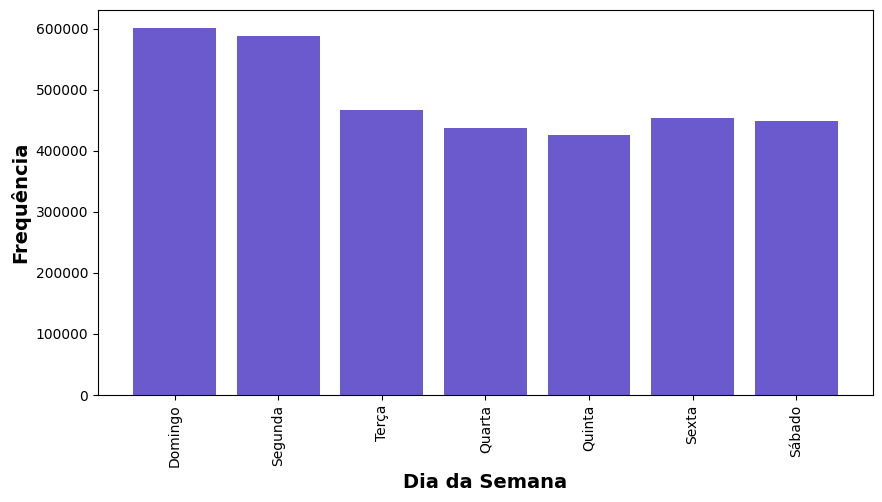

In [ ]:
# Plot
plt.figure(figsize = (10,5))
plt.bar(dias_semana,total_pedidos, color = 'slateblue')
plt.xlabel('Dia da Semana', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequência', fontsize = 14, fontweight = 'bold')
plt.xticks(dias_semana,['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'], rotation = 'vertical')
plt.show()

3) QUAL HORA DO DIA TEM O MAIOR NÚMERO DE PEDIDOS?

In [ ]:

df_orders.groupBy(F.col('order_hour_of_day')).agg(F.count('order_hour_of_day').alias('qtd_pedidos')).orderBy(F.col('qtd_pedidos').desc()).show()

+-----------------+-----------+
|order_hour_of_day|qtd_pedidos|
+-----------------+-----------+
|               10|     288418|
|               11|     284728|
|               15|     283639|
|               14|     283042|
|               13|     277999|
|               12|     272841|
|               16|     272553|
|                9|     257812|
|               17|     228795|
|               18|     182912|
|                8|     178201|
|               19|     140569|
|               20|     104292|
|                7|      91868|
|               21|      78109|
|               22|      61468|
|               23|      40043|
|                6|      30529|
|                0|      22758|
|                1|      12398|
+-----------------+-----------+
only showing top 20 rows



3) QUAL HORA DO DIA TEM O MAIOR NÚMERO DE PEDIDOS?

In [ ]:
lista_horas = list(range(0, 24))
qtd_pedidos = []

for i in range(24):
  qtd_pedidos.append(df_orders.filter(F.col('order_hour_of_day') == i).count())

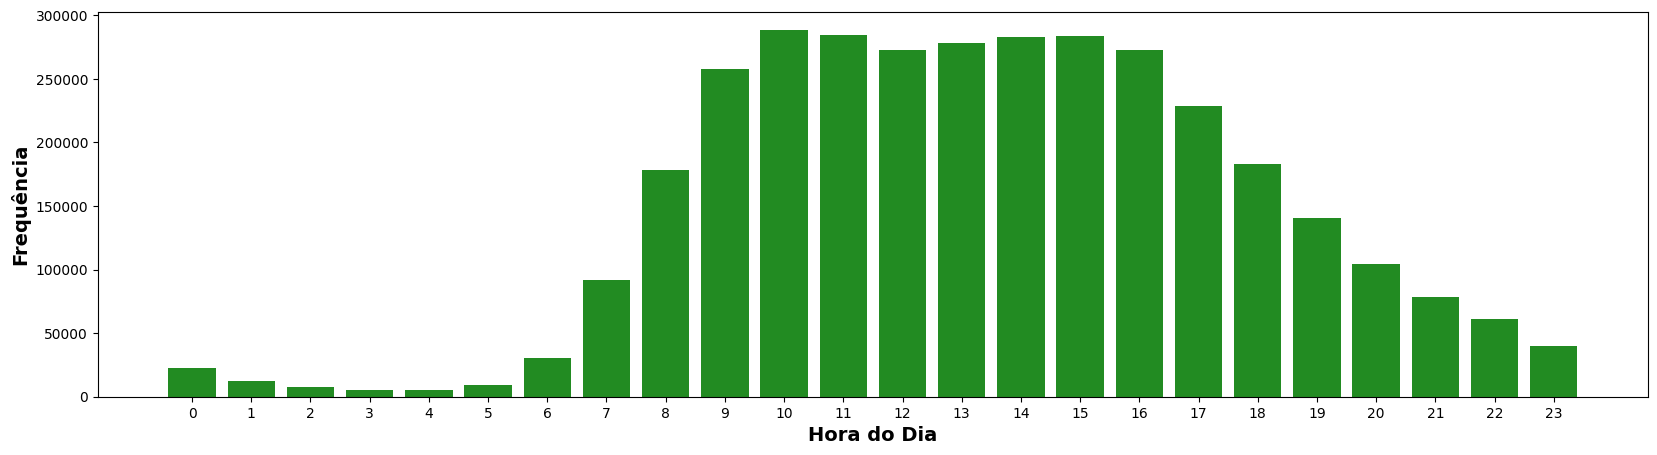

In [ ]:
# Plot
plt.figure(figsize = (20,5))
plt.bar(lista_horas,qtd_pedidos,color = 'forestgreen')
plt.xticks(np.arange(0,24,1))
plt.xlabel('Hora do Dia', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequência', fontsize = 14, fontweight = 'bold')
plt.show()

4) QUAL O DEPARTAMENTO TEM O MAIOR NÚMERO DE PEDIDOS?

In [ ]:
df_departments.show(10)

+-------------+---------------+
|department_id|     department|
+-------------+---------------+
|            1|         frozen|
|            2|          other|
|            3|         bakery|
|            4|        produce|
|            5|        alcohol|
|            6|  international|
|            7|      beverages|
|            8|           pets|
|            9|dry goods pasta|
|           10|           bulk|
+-------------+---------------+
only showing top 10 rows



In [ ]:
df_prod_dep = df_products.join(df_departments, on=['department_id'], how='left')

In [ ]:
df_prod_dep.show()

+-------------+----------+--------------------+--------+---------------+
|department_id|product_id|        product_name|aisle_id|     department|
+-------------+----------+--------------------+--------+---------------+
|           19|         1|Chocolate Sandwic...|      61|         snacks|
|           13|         2|    All-Seasons Salt|     104|         pantry|
|            7|         3|Robust Golden Uns...|      94|      beverages|
|            1|         4|Smart Ones Classi...|      38|         frozen|
|           13|         5|Green Chile Anyti...|       5|         pantry|
|           11|         6|        Dry Nose Oil|      11|  personal care|
|            7|         7|Pure Coconut Wate...|      98|      beverages|
|            1|         8|Cut Russet Potato...|     116|         frozen|
|           16|         9|Light Strawberry ...|     120|     dairy eggs|
|            7|        10|Sparkling Orange ...|     115|      beverages|
|            7|        11|   Peach Mango Juice|    

In [ ]:
#4) QUAL O DEPARTAMENTO TEM O MAIOR NÚMERO DE PEDIDOS?
#df_orders.groupBy(F.col('order_hour_of_day')).agg(F.count('order_hour_of_day').alias('qtd_pedidos')).orderBy(F.col('qtd_pedidos').desc()).show()
df_prod_dep.groupBy(F.col('department_id')).agg(F.count('product_id').alias('qtd_prod')).orderBy(F.col('qtd_prod').desc()).show()

+-------------+--------+
|department_id|qtd_prod|
+-------------+--------+
|           11|    6563|
|           19|    6264|
|           13|    5371|
|            7|    4365|
|            1|    4007|
|           16|    3449|
|           17|    3084|
|           15|    2092|
|            9|    1858|
|            4|    1684|
|            3|    1516|
|           20|    1322|
|           21|    1258|
|            6|    1139|
|           14|    1115|
|           18|    1081|
|            5|    1054|
|            8|     972|
|           12|     907|
|            2|     548|
+-------------+--------+
only showing top 20 rows



5 - QUAIS OS 20 PRINCIPAIS CORREDORES POR FREQUÊNCIA DE PEDIDOS?

In [ ]:
df_aisles.show(5)

+--------+--------------------+
|aisle_id|               aisle|
+--------+--------------------+
|       1|prepared soups sa...|
|       2|   specialty cheeses|
|       3| energy granola bars|
|       4|       instant foods|
|       5|marinades meat pr...|
+--------+--------------------+
only showing top 5 rows



In [ ]:
df_orders.show(1)

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
| 2539329|      1|   prior|           1|        2|                8|                  null|
+--------+-------+--------+------------+---------+-----------------+----------------------+
only showing top 1 row



In [ ]:
#qtd_compras_usuarios.groupBy('qtd_pedidos').
#agg(F.count('qtd_pedidos').alias('frequencia')).orderBy(F.col('frequencia').desc()).show(2)
df_join.groupBy( F.col('aisle')).agg(F.count('order_number').alias('n de pedidos')).orderBy(F.col('n de pedidos').desc()).show(truncate=False)

+-----------------------------+------------+
|aisle                        |n de pedidos|
+-----------------------------+------------+
|fresh fruits                 |860075      |
|fresh vegetables             |806141      |
|packaged vegetables fruits   |417259      |
|yogurt                       |342320      |
|packaged cheese              |231382      |
|milk                         |209946      |
|water seltzer sparkling water|197773      |
|chips pretzels               |171458      |
|soy lactosefree              |150912      |
|bread                        |137707      |
|refrigerated                 |135541      |
|frozen produce               |123666      |
|ice cream ice                |116941      |
|crackers                     |107868      |
|energy granola bars          |107376      |
|eggs                         |107003      |
|lunch meat                   |93002       |
|frozen meals                 |91909       |
|baby food formula            |90865       |
|fresh her

In [ ]:
df_join.agg(F.mode('aisle').alias('moda')).show()

+------------+
|        moda|
+------------+
|fresh fruits|
+------------+



6 - QUAIS OS 20 PRINCIPAIS PRODUTOS POR FREQUÊNCIA DE PEDIDOS?

In [ ]:
df_products_prior.show(3)

+--------+----------+-----------------+---------+--------------------+
|order_id|product_id|add_to_cart_order|reordered|pedido_anteriormente|
+--------+----------+-----------------+---------+--------------------+
|       2|     33120|                1|        1|                 Sim|
|       2|     28985|                2|        1|                 Sim|
|       2|      9327|                3|        0|                 Nao|
+--------+----------+-----------------+---------+--------------------+
only showing top 3 rows



In [ ]:
df_products.show(3)

+----------+--------------------+--------+-------------+
|product_id|        product_name|aisle_id|department_id|
+----------+--------------------+--------+-------------+
|         1|Chocolate Sandwic...|      61|           19|
|         2|    All-Seasons Salt|     104|           13|
|         3|Robust Golden Uns...|      94|            7|
+----------+--------------------+--------+-------------+
only showing top 3 rows



In [ ]:
df_join.groupBy(F.col('product_name')).agg(F.count('order_number').alias('qtd de pedidos')).orderBy(F.col('qtd de pedidos').desc()).show(truncate=False)

+------------------------+--------------+
|product_name            |qtd de pedidos|
+------------------------+--------------+
|Banana                  |111894        |
|Bag of Organic Bananas  |89409         |
|Organic Strawberries    |62730         |
|Organic Baby Spinach    |56825         |
|Organic Hass Avocado    |50366         |
|Organic Avocado         |41385         |
|Large Lemon             |35901         |
|Strawberries            |33691         |
|Limes                   |33088         |
|Organic Whole Milk      |32428         |
|Organic Raspberries     |32103         |
|Organic Yellow Onion    |26618         |
|Organic Garlic          |26053         |
|Organic Zucchini        |24580         |
|Organic Blueberries     |23624         |
|Cucumber Kirby          |23014         |
|Organic Fuji Apple      |21121         |
|Organic Lemon           |20720         |
|Apple Honeycrisp Organic|20184         |
|Organic Grape Tomatoes  |19992         |
+------------------------+--------

7 - ANÁLISE DE NOVOS PEDIDOS SEMELHANTES A PEDIDOS ANTERIORES (reorder)

In [ ]:
df_products_prior.show(2)

+--------+----------+-----------------+---------+--------------------+
|order_id|product_id|add_to_cart_order|reordered|pedido_anteriormente|
+--------+----------+-----------------+---------+--------------------+
|       2|     33120|                1|        1|                 Sim|
|       2|     28985|                2|        1|                 Sim|
+--------+----------+-----------------+---------+--------------------+
only showing top 2 rows



In [ ]:
df_join.groupBy(F.col('product_name'), F.col('reordered')).agg(F.count('order_number').alias('qtd de pedidos')).orderBy(F.col('qtd de pedidos').desc()).show(truncate=False)

+------------------------+---------+--------------+
|product_name            |reordered|qtd de pedidos|
+------------------------+---------+--------------+
|Banana                  |1        |94302         |
|Bag of Organic Bananas  |1        |74275         |
|Organic Strawberries    |1        |48785         |
|Organic Baby Spinach    |1        |43874         |
|Organic Hass Avocado    |1        |40003         |
|Organic Avocado         |1        |31291         |
|Organic Whole Milk      |1        |26920         |
|Large Lemon             |1        |24954         |
|Organic Raspberries     |1        |24531         |
|Strawberries            |1        |23491         |
|Limes                   |1        |22464         |
|Organic Yellow Onion    |1        |18586         |
|Organic Garlic          |1        |17719         |
|Banana                  |0        |17592         |
|Organic Zucchini        |1        |16962         |
|Cucumber Kirby          |1        |15936         |
|Bag of Orga

In [ ]:
df_join.groupBy(F.col('pedido_anteriormente')).agg(F.count('order_number').alias('qtd de pedidos')).orderBy(F.col('qtd de pedidos').desc()).show(truncate=False)

+--------------------+--------------+
|pedido_anteriormente|qtd de pedidos|
+--------------------+--------------+
|Sim                 |4508407       |
|Nao                 |3142946       |
+--------------------+--------------+



In [ ]:
df_join.groupBy(F.col('reordered')).agg(F.count('order_number').alias('qtd de pedidos')).orderBy(F.col('qtd de pedidos').desc()).show(truncate=False)

+---------+--------------+
|reordered|qtd de pedidos|
+---------+--------------+
|1        |4508407       |
|0        |3142946       |
+---------+--------------+



7 - ANÁLISE DE RECOMPRA(reorder) POR DEPARTAMENTO AO LONGO DO TEMPO

In [ ]:
df_join.printSchema()

root
 |-- department_id: string (nullable = true)
 |-- aisle_id: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- order_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)
 |-- pedido_anteriormente: string (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- eval_set: string (nullable = true)
 |-- order_number: integer (nullable = true)
 |-- order_dow: integer (nullable = true)
 |-- order_hour_of_day: integer (nullable = true)
 |-- days_since_prior_order: double (nullable = true)
 |-- product_name: string (nullable = true)
 |-- aisle: string (nullable = true)
 |-- department: string (nullable = true)



In [ ]:
df_orders.groupBy(F.col('order_dow')).sum('order_number').orderBy(F.col('order_dow')).show()
#F.sum('order_number').orderBy(F.col('order_number')).desc().show()

+---------+-----------------+
|order_dow|sum(order_number)|
+---------+-----------------+
|        0|          9561579|
|        1|         10112765|
|        2|          8136105|
|        3|          7787341|
|        4|          7677567|
|        5|          8108367|
|        6|          7304469|
+---------+-----------------+



In [ ]:
df_recompra = df_join.groupBy(F.col('department'), F.col('order_dow'), F.col('order_hour_of_day')).agg(F.sum('reordered').alias("quantidade de recompra")).orderBy(F.col('quantidade de recompra').desc())

In [ ]:
df_recompra.show(3)

+----------+---------+-----------------+----------------------+
|department|order_dow|order_hour_of_day|quantidade de recompra|
+----------+---------+-----------------+----------------------+
|   produce|        0|               14|                 26642|
|   produce|        0|               13|                 25943|
|   produce|        0|               10|                 25718|
+----------+---------+-----------------+----------------------+
only showing top 3 rows



In [ ]:
df_recompra.withColumn('dias_semana', F.regexp_replace(F.col('order_dow'), '0', 'Domingo')

8 - ANÁLISE DE REORDER E PEDIDOS - pessoas que compram determinado produto e compram novamente.

9) Análise de Reorder por Corredor


10 - ANÁLISE DE REORDER POR CORREDOR - Total de Reorder por Corredor de Produtos Conseguimos ver os corredores que menos tiverem novos pedidos, e aqueles que tiveram mais novos pedidos.